This script conducts comprehensive analysis on the combined datasets aggregated in the input data. It addresses four specific research questions by utilizing visualizations and statistical analysis. Before delving into the analysis, the code executes necessary data cleaning procedures to ensure the datasets are prepared for thorough analysis.

In [35]:
# Importing necessary libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [36]:
# Reading smoke estimate data from a CSV file into a pandas DataFrame
smoke_estimate_file_path = '../intermediate data/annual_smoke_estimate.csv'
smoke_estimate_df = pd.read_csv(smoke_estimate_file_path)

In [37]:
smoke_estimate_df.head()

,Unnamed: 0,Year,Smoke_estimate,Mean_GIS_Acres,Mean_Distance
0,0,1963,13.439763,678.272620,902.986249
1,1,1964,14.550933,843.656048,951.798166
2,2,1965,12.092012,617.590558,983.317252
3,3,1966,29.773332,1491.597098,926.228464
4,4,1967,13.824623,712.397832,980.524902


In [38]:
# Reading aggregated input respiratory health data
resp_disease_data_file_path = '../data/NorthDakota_Minot_RespiratoryHealth.csv'
resp_disease_df = pd.read_csv(resp_disease_data_file_path)
resp_disease_df.head()

,Year,Tuberclosis,Influenza,Hospitalization,Male,Female
0,2000,5,363,0,0,0
1,2001,6,996,0,0,0
2,2002,6,650,0,0,0
3,2003,6,1589,0,0,0
4,2004,4,3752,0,0,0


# Research Question 1

**How does fire smoke relate to the Tuberculosis rate for respiratory diseases in Ward County, Minot across different years?**

To address this research question, we'll compare the average Tuberclosis cases and smoke estimate.

In [39]:
smoke_estimate_df.loc[smoke_estimate_df['Year'] >= 2000, 'Year']

37    2000
38    2001
39    2002
40    2003
41    2004
42    2005
43    2006
44    2007
45    2008
46    2009
47    2010
48    2011
49    2012
50    2013
51    2014
52    2015
53    2016
54    2017
55    2018
56    2019
57    2020
Name: Year, dtype: int64

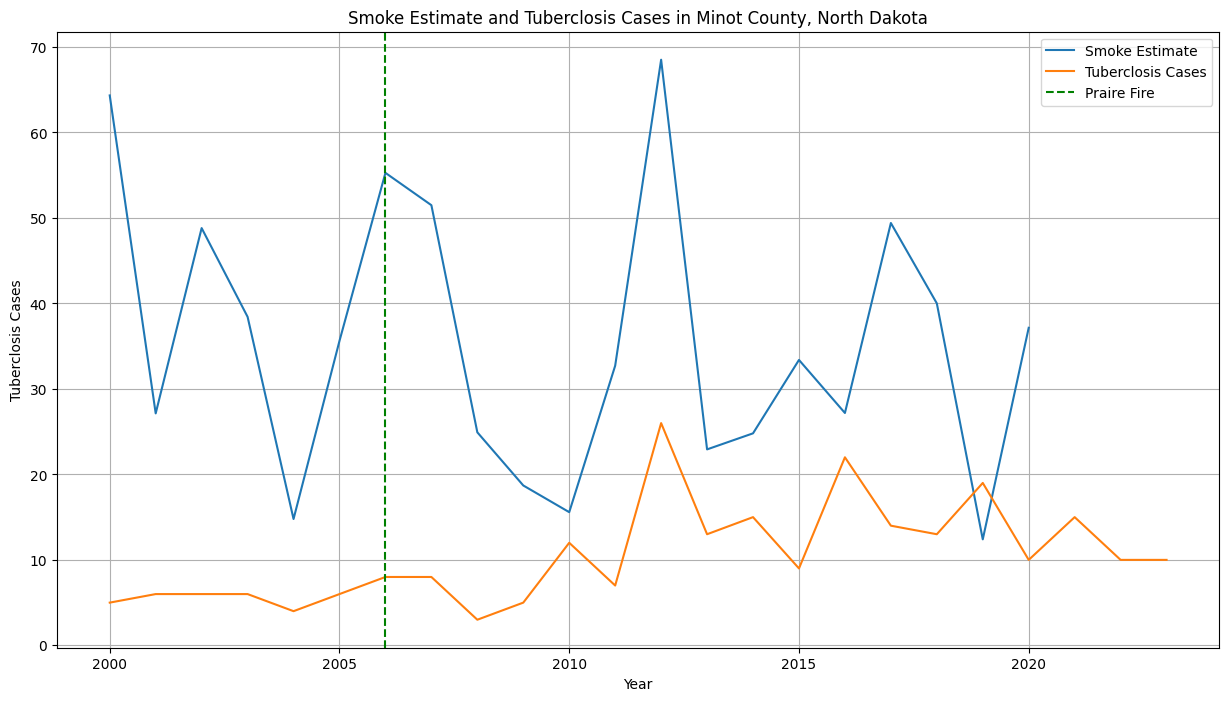

In [51]:
# Plotting age-standardized mortality rates for males and females with asthma in Tulare County
plt.figure(figsize=(15, 8))
plt.plot(smoke_estimate_df.loc[smoke_estimate_df['Year'] >= 2000, 'Year'], smoke_estimate_df.loc[smoke_estimate_df['Year'] >= 2000, 'Smoke_estimate'], label="Smoke Estimate")
plt.plot(resp_disease_df['Year'], resp_disease_df['Tuberclosis'], label="Tuberclosis Cases")
plt.title('Smoke Estimate and Tuberclosis Cases in Minot County, North Dakota')
plt.xlabel('Year')
plt.ylabel('Tuberclosis Cases')
plt.grid(True)
plt.legend()

# Adding vertical lines for notable events
plt.axvline(x=2006, color='green', linestyle='--', label='Praire Fire')
plt.legend()
plt.show()

In [41]:
nd_smoke_estimate = smoke_estimate_df.loc[smoke_estimate_df['Year'] >= 2000, :]
nd_resp_disease = resp_disease_df.loc[resp_disease_df['Year'] <= 2020, :]

# Extract relevant columns
YEAR = nd_smoke_estimate['Year']
SMOKE_ESTIMATE = nd_smoke_estimate['Smoke_estimate']
TUBERCULOSIS_CASES = nd_resp_disease['Tuberclosis']

# Perform correlation test
correlation, p_value = stats.pearsonr(SMOKE_ESTIMATE, TUBERCULOSIS_CASES)
print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Check for statistical significance
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("There is a significant correlation between smoking estimates and tuberculosis cases.")
else:
    print("There is no significant correlation between smoking estimates and tuberculosis cases.")

Correlation coefficient: 0.103396319877425
P-value: 0.6555924669554398
There is no significant correlation between smoking estimates and tuberculosis cases.


In [42]:
import statsmodels.api as sm

# Merge the two DataFrames on a common column, e.g., 'year'
nd_data = pd.merge(nd_smoke_estimate, nd_resp_disease, on='Year')

# Define predictor and response variables
predictor = 'Smoke_estimate'
response = 'Tuberclosis'

# Create a linear regression model
X = nd_data[predictor]
y = nd_data[response]
X = sm.add_constant(X)  # Add a constant for the intercept term

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Tuberclosis   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                    0.2053
Date:                Mon, 11 Dec 2023   Prob (F-statistic):              0.656
Time:                        14:14:48   Log-Likelihood:                -67.349
No. Observations:                  21   AIC:                             138.7
Df Residuals:                      19   BIC:                             140.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.9277      3.392      2.

The linear regression analysis suggests that there isn't a statistically significant linear relationship between smoking estimates and tuberculosis cases in Minot County, North Dakota. The model doesn’t effectively explain the variability in tuberculosis cases based solely on smoking estimates.

An R-squared of 0.011 means that only about 1.1% of the variability in tuberculosis cases (Tuberclosis) can be explained by changes in smoking estimates (Smoke_estimate). In other words, the model doesn’t explain much of the variation in tuberculosis cases based on smoking estimates.

# Research Question 2
**How does fire smoke relate to the influenza rates for respiratory diseases in Minot County across different years?**

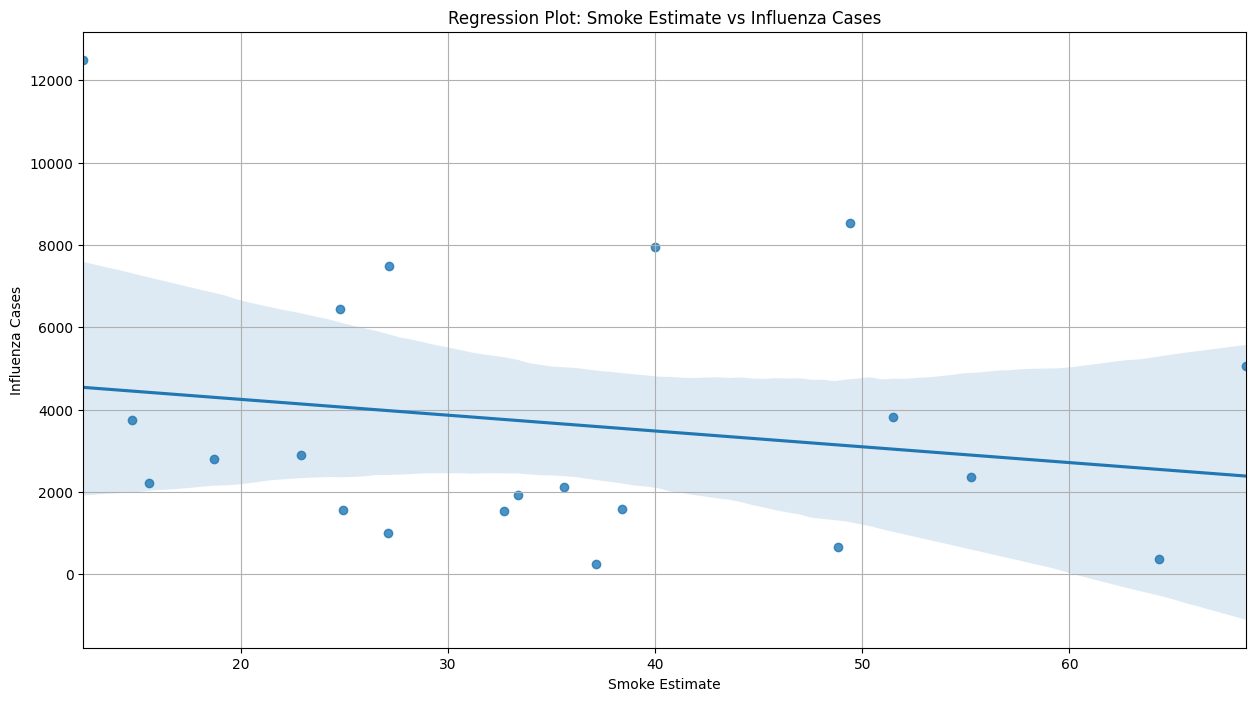

In [50]:
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.regplot(x='Smoke_estimate', y='Influenza', data=nd_data)
plt.xlabel('Smoke Estimate')
plt.ylabel('Influenza Cases')
plt.title('Regression Plot: Smoke Estimate vs Influenza Cases')
plt.grid(True)
plt.show()

In [44]:
import statsmodels.api as sm

# Merge the two DataFrames on a common column "Year"
nd_data = pd.merge(nd_smoke_estimate, nd_resp_disease, on='Year')

# Define predictor and response variables
predictor = 'Smoke_estimate'
response = 'Influenza'

# Create a linear regression model
X = nd_data[predictor]
y = nd_data[response]
X = sm.add_constant(X)  # Add a constant for the intercept term

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Influenza   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.7244
Date:                Mon, 11 Dec 2023   Prob (F-statistic):              0.405
Time:                        14:14:51   Log-Likelihood:                -198.49
No. Observations:                  21   AIC:                             401.0
Df Residuals:                      19   BIC:                             403.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5015.6407   1747.571      2.

Based on this regression analysis, the relationship between smoking estimates and influenza cases in North Dakota appears weak and statistically insignificant. The model doesn't adequately explain the variability in influenza cases solely based on smoking estimates

The F-statistic tests the overall significance of the model. A low F-statistic value (0.7244) with a high associated p-value (0.405) suggests that the model as a whole does not significantly explain the variability in influenza cases based on smoking estimates.

# Research Question 3
**Is there a noticeable difference in male and female hospotalization rates due to variations in exposure to fire smoke in Minot County?**

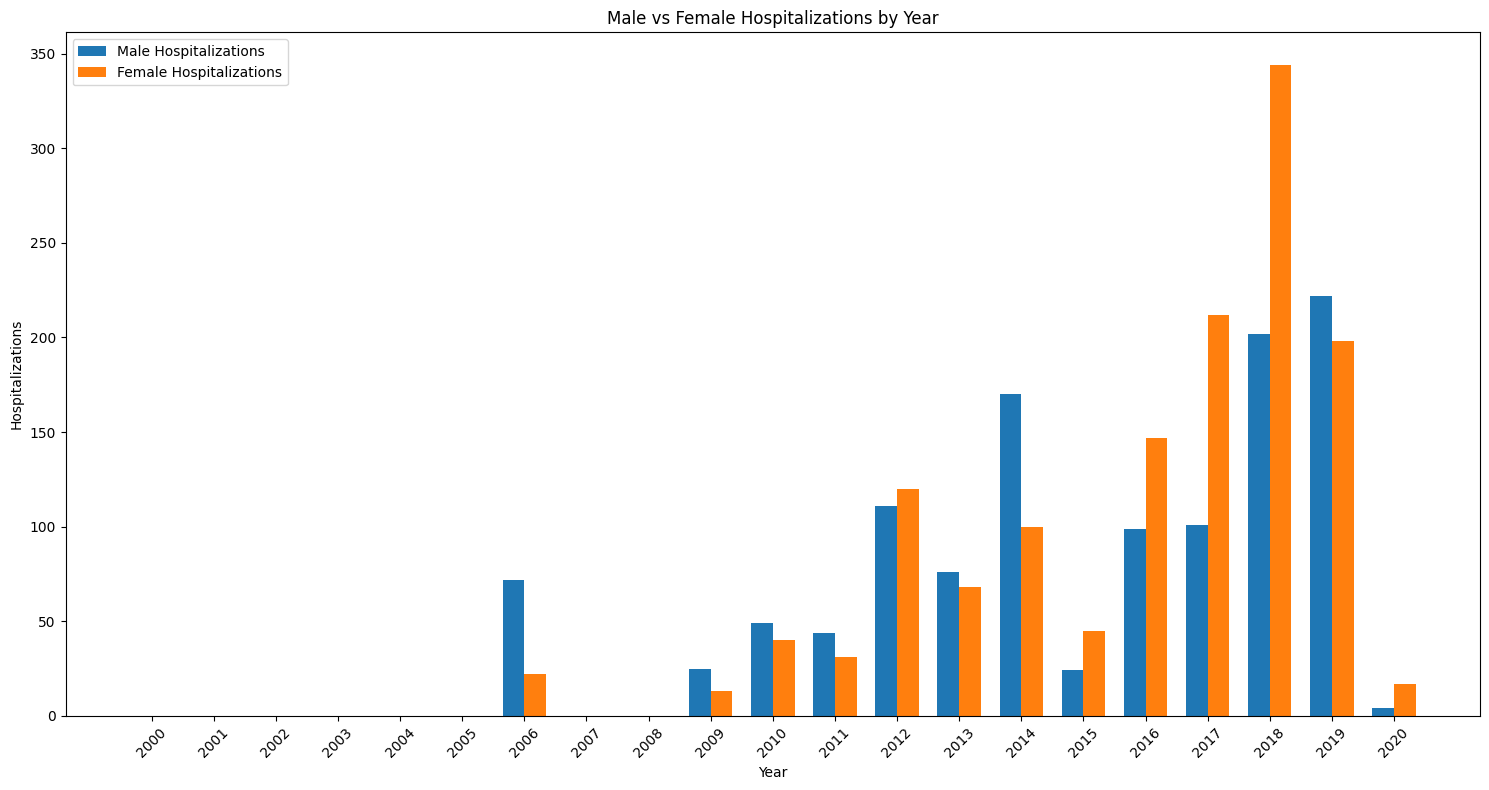

In [49]:
import matplotlib.pyplot as plt
import numpy as np

years = nd_data['Year']
male_hosp = nd_data['Male']
female_hosp = nd_data['Female']

x = np.arange(len(years))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
bars1 = ax.bar(x - width/2, male_hosp, width, label='Male Hospitalizations')
bars2 = ax.bar(x + width/2, female_hosp, width, label='Female Hospitalizations')

ax.set_xlabel('Year')
ax.set_ylabel('Hospitalizations')
ax.set_title('Male vs Female Hospitalizations by Year')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


The Mann-Whitney U Test evaluates if there's a significant difference in hospitalizations between males and females without making assumptions about the distribution of data. A significant result implies a meaningful distinction in hospitalization rates between genders.

In [47]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(male_hosp, female_hosp)

alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("There is a significant difference between male and female hospitalizations.")
else:
    print("There is no significant difference between male and female hospitalizations.")

print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")


There is no significant difference between male and female hospitalizations.
Statistic: 218.0
P-value: 0.4793609086481403


- Conclusion: There is no significant difference between male and female hospitalizations across the studied years.

- Interpretation of the Test Result: With a p-value of 0.479, it indicates that if there were genuinely no difference in hospitalization rates between males and females (null hypothesis being true), there would still be a 47.9% probability of observing a difference as extreme as, or more extreme than, the one observed in the sample.

In essence, the statistical analysis suggests that, based on the data and the chosen statistical test, there isn't enough evidence to claim a significant difference in influenza-related hospitalizations between males and females across the studied years.